In [ ]:
# Develop a GRU based term stock price prediction model for tickers in yahoo finance.

[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 86ms/step - loss: 0.0748
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - loss: 0.0023
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0018
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0018
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0012
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 0.0013
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0013
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0014
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0011
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0013
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step


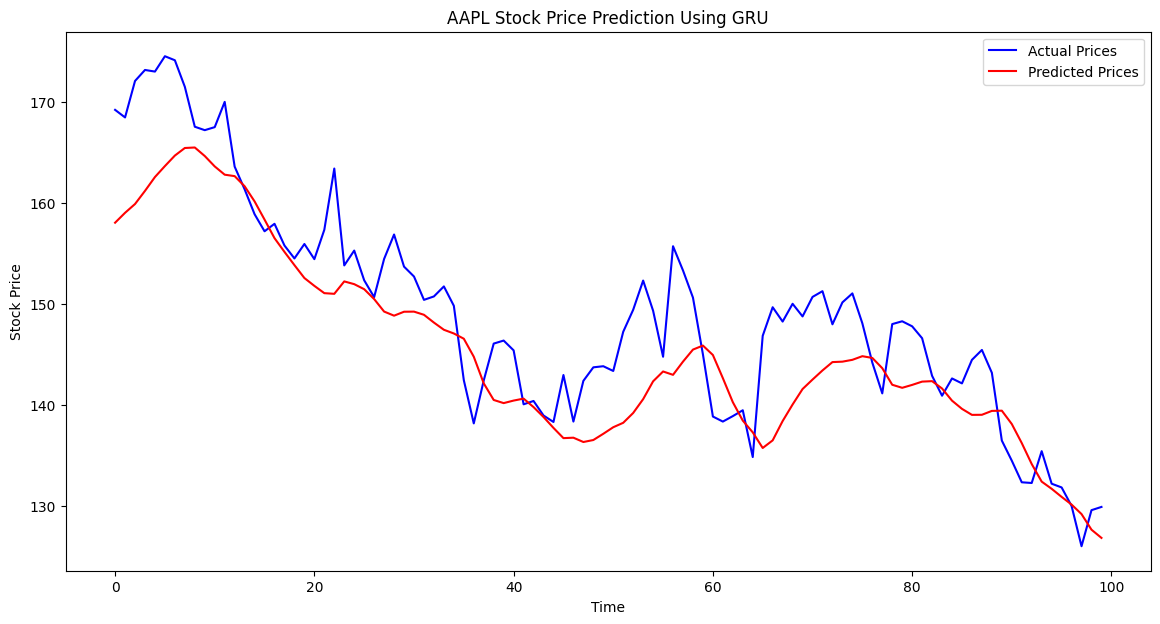

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")
if data.empty:
    raise ValueError(f"No data found for ticker {ticker}. Check the symbol and try again.")
prices = data["Close"].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)
sequence_length = 60
x_train, y_train = [], []
for i in range(sequence_length, len(scaled_data)):
    x_train.append(scaled_data[i-sequence_length:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    Dropout(0.2),
    GRU(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=10)
test_data = scaled_data[len(scaled_data) - sequence_length - 100:]
x_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
    x_test.append(test_data[i-sequence_length:i, 0])
    y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
plt.figure(figsize=(14, 7))
plt.plot(prices[-len(y_test):], color="blue", label="Actual Prices")
plt.plot(predicted_prices, color="red", label="Predicted Prices")
plt.title(f"{ticker} Stock Price Prediction Using GRU")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()